# HEART DISEASE PREDICTION
The dataset is publically available on the Kaggle website, and it is from a cardiovascular study on residents of the town of Framingham, Massachusetts. 

link to the dataset: https://www.kaggle.com/datasets/dileep070/heart-disease-prediction-using-logistic-regression

The classification **goal** is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).

The dataset provides the patients' information. It includes over 4,000 records and 15 attributes.
  - **Sex**: male or female
  - **Age**: Age of the patient
  - **education**: level of education
  - **Current Smoker**: whether or not the patient is a current smoker
  - **Cigs Per Day**: the number of cigarettes that the person smoked on average in one day
  - **BP Meds**: whether or not the patient was on blood pressure medication
  - **Prevalent Stroke**: whether or not the patient had previously had a stroke
  - **Prevalent Hyp**: whether or not the patient was hypertensive
  - **Diabetes**: whether or not the patient had diabetes
  - **Tot Chol**: total cholesterol level
  - **Sys BP**: systolic blood pressure
  - **Dia BP**: diastolic blood pressure
  - **BMI**: Body Mass Index
  - **Heart Rate**: heart rate
  - **Glucose**: glucose level
  - **10 year risk of coronary heart disease CHD** (binary: '1', means 'Yes', '0' means 'No')

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data = pd.read_csv('framingham.csv')

In [3]:
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
data.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

# Data Visualization

<AxesSubplot:>

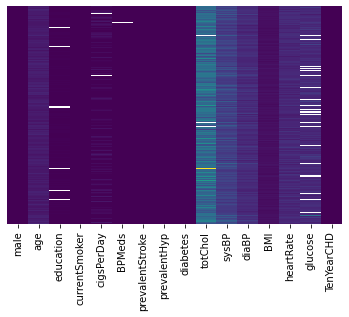

In [5]:
#info above shows null values for some variables
#lets show with heatmap as well
sns.heatmap(data, yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

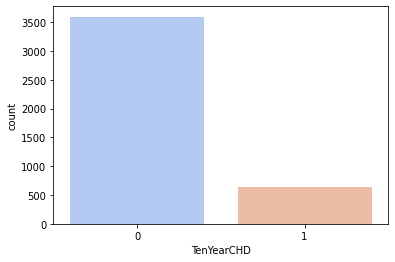

In [6]:
sns.countplot(x='TenYearCHD', data= data, palette='coolwarm')
#the dataset is imblanced

<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

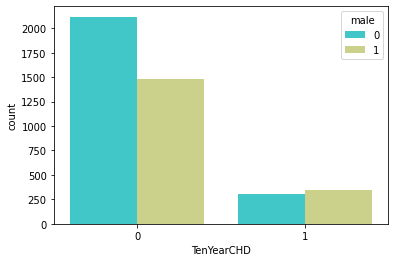

In [7]:
#let's see how the data distributed in terms of gender
sns.countplot(x='TenYearCHD', hue='male', data= data, palette='rainbow')
#male=1 --> men, male=0 --> women
# similar pattern for both genders (10 year risk of coronary heart disease CHD == 1)

<AxesSubplot:xlabel='male', ylabel='count'>

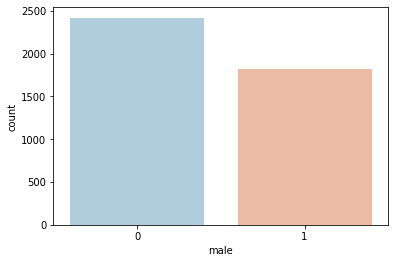

In [8]:
sns.countplot(x='male', data= data, palette='RdBu_r')

<AxesSubplot:>

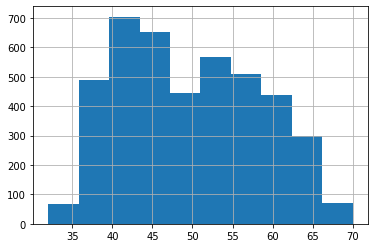

In [9]:
data['age'].hist()

<AxesSubplot:>

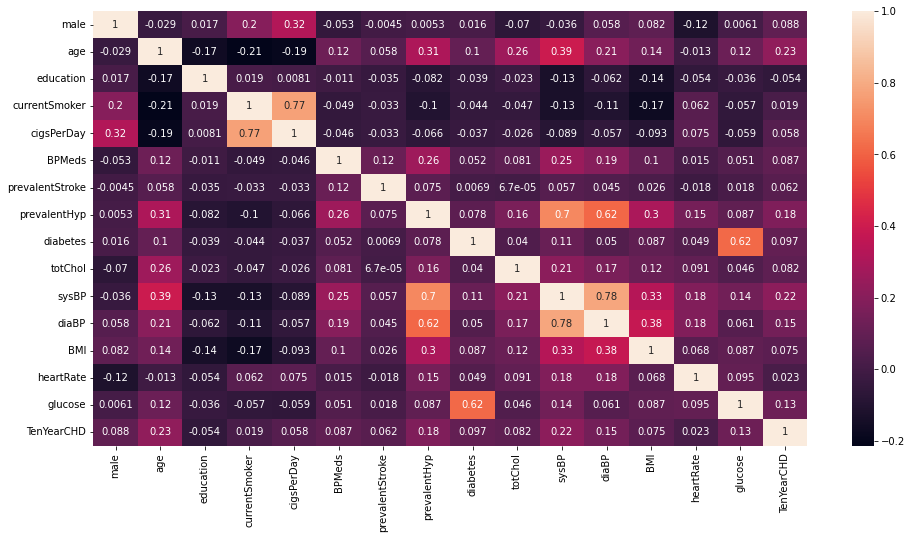

In [10]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.heatmap(ax=ax,data=data.corr(),annot=True)

<AxesSubplot:xlabel='age', ylabel='diabetes'>

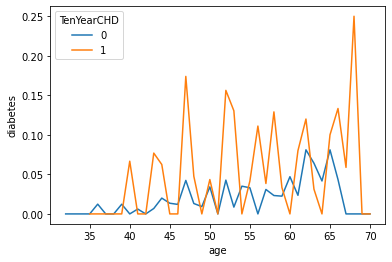

In [11]:
sns.lineplot(data= data, y='diabetes', x= 'age',ci=None, hue='TenYearCHD')

<AxesSubplot:xlabel='age', ylabel='glucose'>

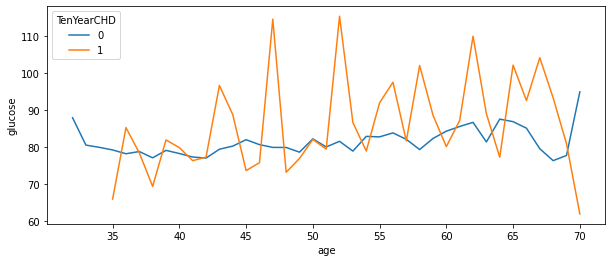

In [12]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.lineplot(ax=ax,data= data, y='glucose', x= 'age', hue='TenYearCHD',ci=None)

In [13]:
data['glucose'].describe()

count    3850.000000
mean       81.966753
std        23.959998
min        40.000000
25%        71.000000
50%        78.000000
75%        87.000000
max       394.000000
Name: glucose, dtype: float64

<AxesSubplot:xlabel='diabetes', ylabel='glucose'>

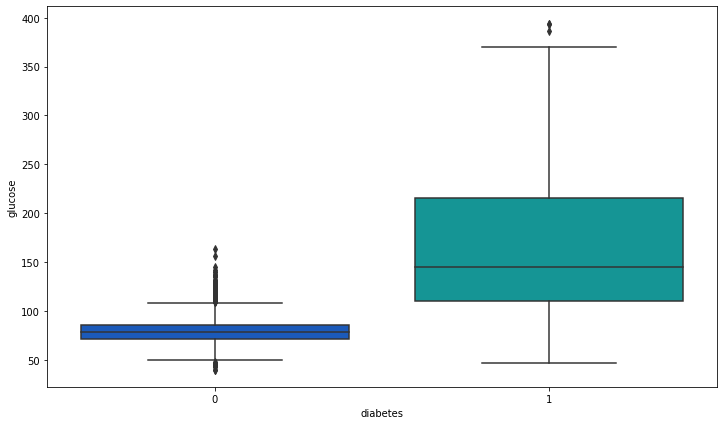

In [14]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='diabetes',y='glucose',data=data,palette='winter')

In [15]:
data.groupby(by='diabetes').mean()['glucose']

diabetes
0     79.489186
1    170.333333
Name: glucose, dtype: float64

In [16]:
#impute glucose column based on the avg value of two groups: diabetes 0, 1
def impute_glu(d):
  glucose = d[0]
  diabetes = d[1]

  if pd.isnull(glucose):
    if diabetes == 0:
      return 79.49
    else:
      return 170.4
  else:
    return glucose

In [17]:
data['glucose'] = data[['glucose','diabetes']].apply(impute_glu,axis=1)

In [18]:
#remove rows with missing values for other columns
data.dropna(axis=0,inplace=True)

<AxesSubplot:>

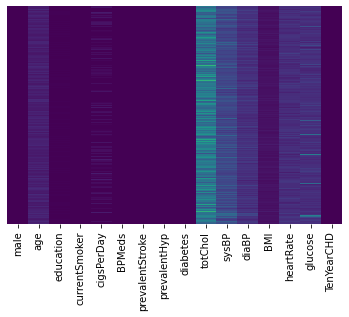

In [19]:
#let's check the heat map again! No missing value.
sns.heatmap(data, yticklabels=False,cbar=False,cmap='viridis')

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3987 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             3987 non-null   int64  
 1   age              3987 non-null   int64  
 2   education        3987 non-null   float64
 3   currentSmoker    3987 non-null   int64  
 4   cigsPerDay       3987 non-null   float64
 5   BPMeds           3987 non-null   float64
 6   prevalentStroke  3987 non-null   int64  
 7   prevalentHyp     3987 non-null   int64  
 8   diabetes         3987 non-null   int64  
 9   totChol          3987 non-null   float64
 10  sysBP            3987 non-null   float64
 11  diaBP            3987 non-null   float64
 12  BMI              3987 non-null   float64
 13  heartRate        3987 non-null   float64
 14  glucose          3987 non-null   float64
 15  TenYearCHD       3987 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.5 KB


# Training a Logistic Regression Model

# **Train Test Split**

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X = data.drop('TenYearCHD',axis=1)
y= data['TenYearCHD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)


In [23]:
y.value_counts()

0    3392
1     595
Name: TenYearCHD, dtype: int64

In [24]:
# scaling the data using MinMaxScaler 
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

x_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.fit_transform(X_test)

# **Training and Predicting**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [31]:
logisticmodel = LogisticRegression()
logisticmodel.fit(x_train_scaled,y_train)

LogisticRegression()

In [32]:
predicted = logisticmodel.predict(x_test_scaled)

In [34]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91       998
           1       0.52      0.06      0.10       199

    accuracy                           0.83      1197
   macro avg       0.68      0.52      0.50      1197
weighted avg       0.79      0.83      0.77      1197



In [25]:
#As showed before the class label is unbalanced and f1-score for negative class '0' is very low 0.10
#To balance data and train the model with balanced dataset, we can use either under_sampling or over_sampling methods 
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(x_train_scaled, y_train)

In [26]:
y_res.value_counts()

0    396
1    396
Name: TenYearCHD, dtype: int64

In [27]:
#Traing the model using new balanced dataset
logmodel = LogisticRegression()
logmodel.fit(X_res,y_res)

LogisticRegression()

In [29]:
predictions = logmodel.predict(x_test_scaled)

In [30]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.90      0.66      0.76       998
           1       0.27      0.63      0.38       199

    accuracy                           0.66      1197
   macro avg       0.59      0.65      0.57      1197
weighted avg       0.80      0.66      0.70      1197



By comparing the result of **logisticmodel** and **logmodel**, we see that the latter better can detect the negetaive class '1' (having 10 year risk of coronary heart disease CHD), but it still needs improvment as the f1-score for this class is 0.38 and not even close to 1.